In [1]:
#Set seed
import numpy as np
np.random.seed(31415)

In [2]:
import os
from sklearn.manifold import TSNE
from sklearn.decomposition import IncrementalPCA as IPCA

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import seaborn as sns
import pandas as pd

import torch

In [3]:
path_embd_no_average = 'SpeakerRecognition_tutorial/elia_embeddings/no_average/enroll/'
path_embd =  'SpeakerRecognition_tutorial/elia_embeddings/average/enroll/'

In [4]:
def load_embeddings(path):
    np_embds = []

    i = 0
    y_true = []
    for file in os.listdir(path):
        

        th_embd = torch.load(os.path.join(path, file))
        np_embds.append(th_embd.data.numpy())

        for j in range(th_embd.shape[0]):
            y_true.append(i)
        i+=1
        
        
    X = np.concatenate(np_embds)
        
    return X, y_true

In [5]:
x_embd, y_embd = load_embeddings(path_embd)
X, y_true = load_embeddings(path_embd_no_average)

In [6]:
n_classes = len(np.unique(y_true))

In [7]:
n_classes

11

### TSNE

In [16]:
def compute_plot_tsne(data, plot=True):
    tsne_out = TSNE(n_components=2, random_state=10, init='pca', verbose=0).fit_transform(data)
    
    if plot:
        plt.figure(figsize=(10,10))
        plt.scatter(tsne_out[:, 0], tsne_out[:, 1])
        plt.plot()
        plt.show()
        plt.close()
    
    return tsne_out

In [17]:

def compute_plot_pca(data, plot=True):
    ipca_out = IPCA(n_components=2).fit_transform(data)
    
    if plot:
        plt.figure(figsize=(10,10))
        plt.scatter(ipca_out[:, 0], ipca_out[:, 1])
        plt.plot()
        plt.show()
        plt.close()
    
    return ipca_out

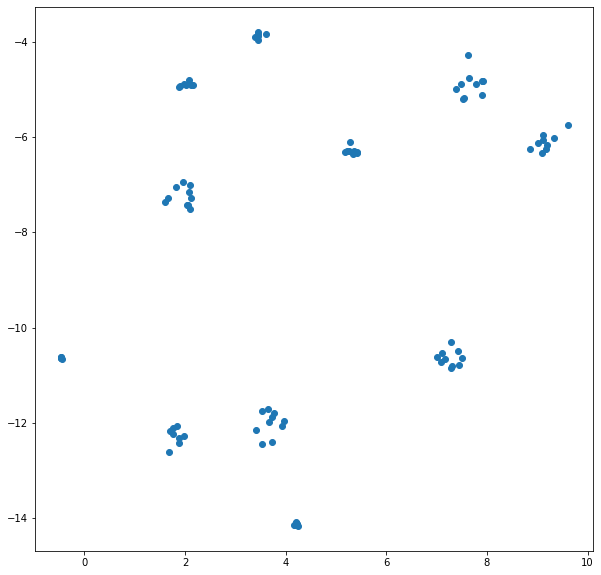

In [18]:
tsne_out = compute_plot_tsne(X)

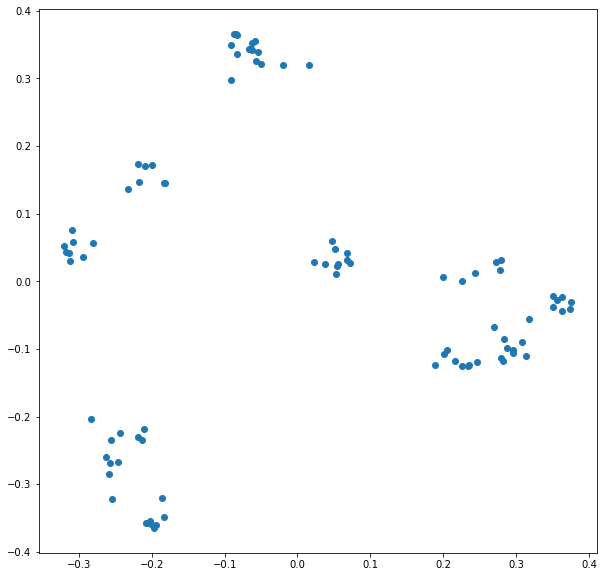

In [14]:
pca_out = compute_plot_pca(X)

### Clustering

In [20]:
def compute_cluster(data):
    
    agglom_clustering = AgglomerativeClustering(n_clusters=n_classes, affinity = "cosine", linkage = "complete").fit(data)  
    k_means = KMeans(n_clusters=n_classes).fit(data)
    
    
    return agglom_clustering, k_means

In [21]:
def plot_cluster(data, labels):
    
    df_data = pd.DataFrame(data, columns=['dim_1', 'dim_2'])
    
    
    #f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
    fig = plt.figure(figsize=(10, 10))
    
    sns.set_context("notebook", font_scale=1.1)
    sns.set_style("ticks")
    sns.scatterplot(
        x='dim_1',
        y='dim_2',
        hue=labels,
        palette=sns.color_palette("hls", len(np.unique(labels))),
        data=df_data,
        legend="full",
        s=200,
        alpha=1.0
    )
    
    #plt.show()
    #plt.close()

### TSNE Results

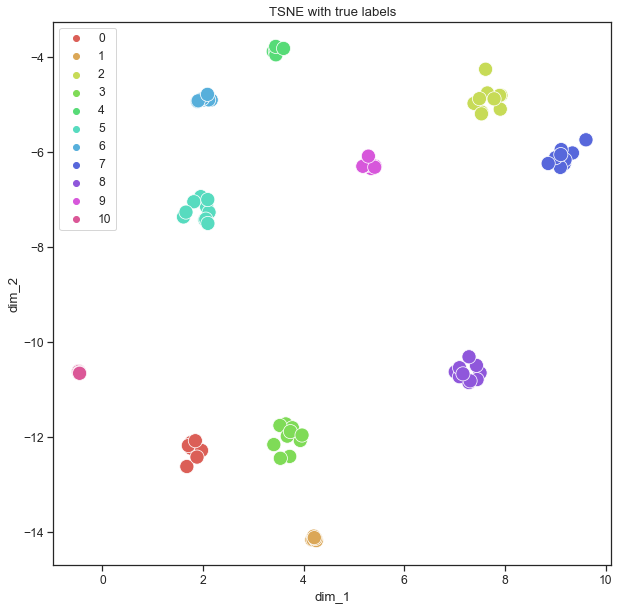

In [22]:
plot_cluster(tsne_out, y_true)
plt.title('TSNE with true labels')
plt.show()

In [23]:
tsne_agg, tsne_kmeans = compute_cluster(tsne_out)

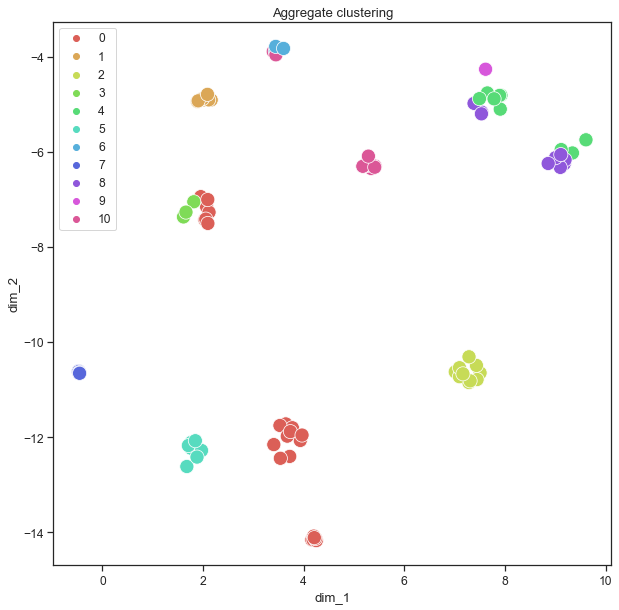

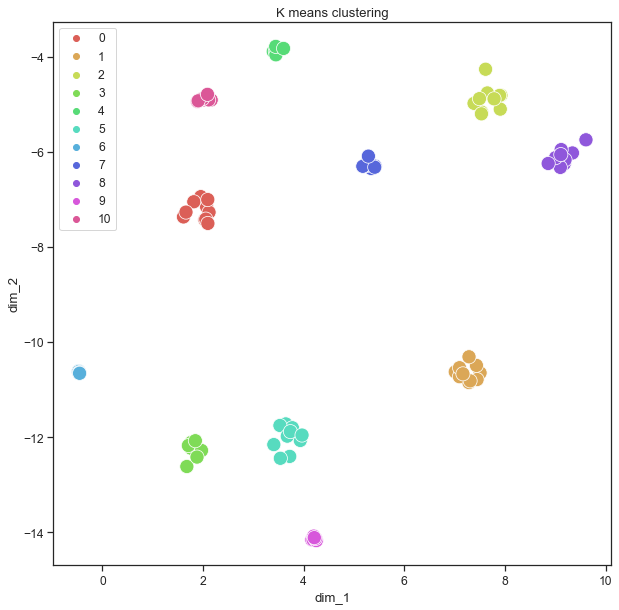

In [25]:


plot_cluster(tsne_out, tsne_agg.labels_)
plt.title('Aggregate clustering')
plt.show()

plot_cluster(tsne_out, tsne_kmeans.labels_)
plt.title('K means clustering')
plt.show()

### PCA results

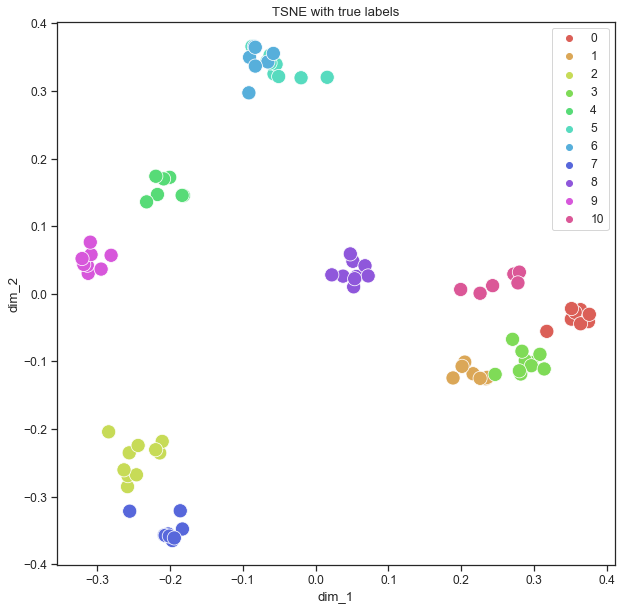

In [26]:
plot_cluster(pca_out, y_true)
plt.title('TSNE with true labels')
plt.show()

In [27]:
pca_agg, pca_kmeans = compute_cluster(pca_out)

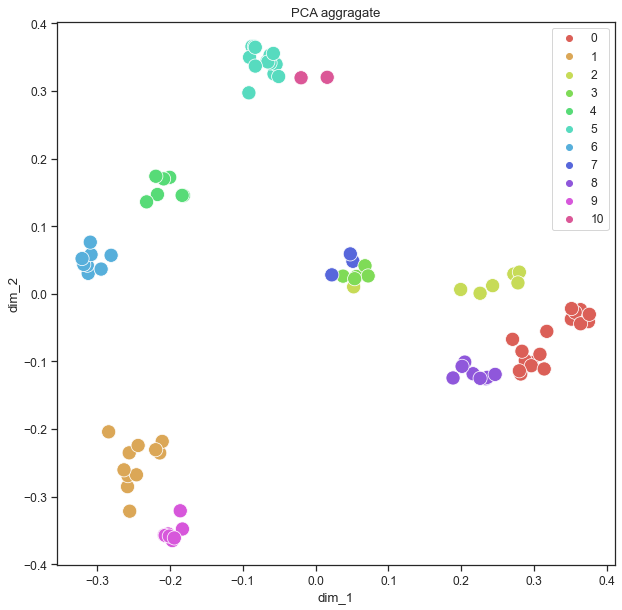

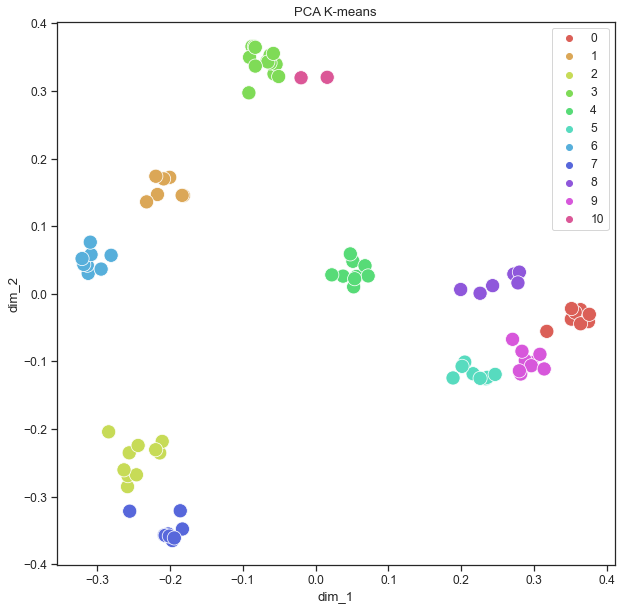

In [28]:
plot_cluster(pca_out, pca_agg.labels_)
plt.title('PCA aggragate')
plt.show()

plot_cluster(pca_out, pca_kmeans.labels_)
plt.title('PCA K-means')
plt.show()

### Compute metrics

In [29]:
from sklearn import metrics

def compute_matrics(y_pred):
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_true, y_pred))
    print("Completeness: %0.3f" % metrics.completeness_score(y_true, y_pred))
    print("V-measure: %0.3f" % metrics.v_measure_score(y_true, y_pred))
    print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(y_true, y_pred))

In [30]:
compute_matrics(tsne_agg.labels_)
print('='*10)
compute_matrics(tsne_kmeans.labels_)

Homogeneity: 0.806
Completeness: 0.876
V-measure: 0.840
Adjusted Rand-Index: 0.593
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand-Index: 1.000


In [31]:
compute_matrics(pca_agg.labels_)
print('='*10)
compute_matrics(pca_kmeans.labels_)

Homogeneity: 0.857
Completeness: 0.902
V-measure: 0.879
Adjusted Rand-Index: 0.706
Homogeneity: 0.939
Completeness: 0.961
V-measure: 0.950
Adjusted Rand-Index: 0.869


In [34]:
'''
matrix = metrics.cluster.contingency_matrix(y_true, y_pred, sparse=False)

matrix = matrix.transpose()
best = [np.argmax(x) for x in matrix]

matrix = matrix.transpose()
count = 0
incorrect = 0
# no_cluster = 0
for x in matrix:
    for i in range(len(x)):
        if count == best[i]:
            incorrect -= x[i]
            continue
    incorrect += sum(x)
    count += 1
    
print("Misclassification rate = {}".format(incorrect / len(y_pred)))
# print("Number of speakers put in the wrong cluster: {}".format(no_cluster))


print(matrix)
'''

'\nmatrix = metrics.cluster.contingency_matrix(y_true, y_pred, sparse=False)\n\nmatrix = matrix.transpose()\nbest = [np.argmax(x) for x in matrix]\n\nmatrix = matrix.transpose()\ncount = 0\nincorrect = 0\n# no_cluster = 0\nfor x in matrix:\n    for i in range(len(x)):\n        if count == best[i]:\n            incorrect -= x[i]\n            continue\n    incorrect += sum(x)\n    count += 1\n    \nprint("Misclassification rate = {}".format(incorrect / len(y_pred)))\n# print("Number of speakers put in the wrong cluster: {}".format(no_cluster))\n\n\nprint(matrix)\n'